# A/B Testing and Power Analysis
<i>By Diego Ramallo</i>

<img src="https://dl.dropboxusercontent.com/u/59776078/data_science/data_science/branch-1290017_1280.png" alt="Drawing" style="width: 350px;"/>

A/B testing is an experimental method used to <strong>measure the effect of a variable on a target response</strong>. For example, many tech companies use this method to test the effect of product features on an outcome such as visits, click-through rate, and other metrics that indicate business success. As a data scientist, <strong>the outcome of your A/B tests can help your clients make data-driven business decisions.</strong> Here, we will provide a walkthrough with examples and tips for how to conduct an A/B test and how to analyze the data properly.

[Experimental Design](#Experimental Design)

[Hypothesis Testing](#Hypothesis Testing)

[Continuous Data Example](#Continuous Data Example)

[Power Analysis](#Power Analysis)

[Final Thoughts](#Final Thoughts)



## Experimental Design

<a id='Experimental Design'></a>

Before conducting your A/B test, it's important to understand your system, your data, and potential outcomes. Typically, you'll be testing whether the difference you observe between two conditions is significant enough to make a decision/enact a feature on that action. Here are a few questions you should answer before performing an A/B test:

1. What is the metric that I will be measuring? What variables will I be comparing? 
2. Do I currently have the data to answer this question? Is it continuous or categorical?
3. How will I test my hypothesis?
4. How much data will be necessary to detect a significant result? This is called  <strong>Power Analysis</strong>.  

## Continuous Data Example

<a id='Continuous Data Example'></a>

Let's assume we're interested in improving the amount of money people donate to our charity. We have the option of using either a blue or an orange 'donate' button to see if one is better at bringing in donations than the other. This will require an A/B test!

Since we will have sampled our users from the same population and just given them different button conditions, we'll assume equal variance (same sigma). 

In [4]:
import numpy as np

#Generate normal distribution mean and standard deviations both buttons
blue_mu, blue_sigma= 20,3
orange_mu, orange_sigma= 15,3

#Sample data for each button using above parameters
blue_button_donation= np.random.normal(blue_mu,blue_sigma,1000)
orange_button_donation= np.random.normal(orange_mu,orange_sigma,1000)

print 'Here is a glimpse of some of our data:'
print 'Blue button donations, orange button donations'
zip(blue_button_donation[0:10], orange_button_donation[0:10])

Here is a glimpse of some of our data:
Blue button donations, orange button donations


[(18.156321836851895, 14.777084329763184),
 (25.800547216297286, 17.340742155332951),
 (15.774288142410242, 7.8369576634524414),
 (23.634530554455623, 9.0340382022539849),
 (21.463486665328535, 14.372035458426984),
 (18.603149512501492, 14.913675725295816),
 (20.80352413445409, 20.718765016350716),
 (17.072014423337386, 10.6958697118041),
 (20.432075044394328, 17.325436857249496),
 (15.353436781774192, 17.141670442017503)]

Histograms


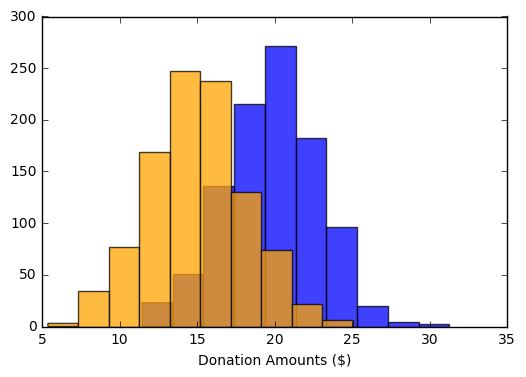

In [7]:
import matplotlib.pyplot as plt

#Plot histogram
%matplotlib inline
plt.hist(blue_button_donation, color= 'blue', alpha= 0.75)
plt.hist(orange_button_donation, color= 'orange', alpha= 0.75)
plt.xlabel('Donation Amounts ($)')
print 'Histograms'

### Skewed Normal Distribution

What happens if our data isn't normal though? Let's first look to see how the data could look.

In [18]:
from scipy.stats import skewnorm

a= 5
b= 100
blue_skewed= skewnorm.rvs(a, size=1000, random_state=None)
orange_skewed= skewnorm.rvs(b, size=1000, random_state=None)

(array([ 247.,  220.,  187.,  135.,  108.,   48.,   28.,   19.,    6.,    2.]),
 array([-0.01850516,  0.29770551,  0.61391618,  0.93012685,  1.24633752,
         1.56254819,  1.87875886,  2.19496953,  2.5111802 ,  2.82739086,
         3.14360153]),
 <a list of 10 Patch objects>)

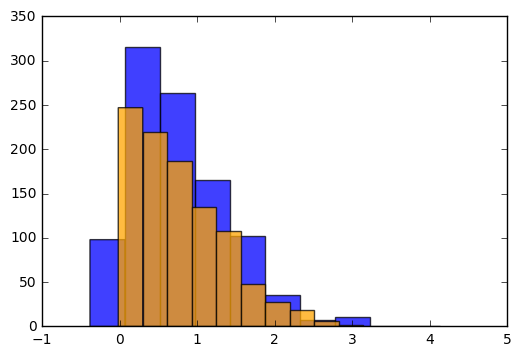

In [19]:
plt.hist(blue_skewed, alpha= 0.75)
plt.hist(orange_skewed, color= 'orange', alpha= 0.75)

## Hypothesis Testing

<a id='Hypothesis Testing'></a>

Now that we have our data, we need to test it. For continuous data we have a few flavors of tests.

a) If normally distributed: paired (before and after) or unpaired (one condition vs 2nd condition) t-tests. 

b) If NOT normally distributed, t-tests may still work, but you'll likely need very large datasets. A better option could be to use equivalent tests that don't assume normality, and compare the medians instead of means. For unpaired tests we can use the Wilcoxon/Mann-Whitney Test.

Be cautious about performing t-test on log-transformed data: means you're comparing may no longer reflect differences in means of original data!

For now, since our data is normally distributed we'll perform a very simple two-sample t-test using scipy's stats library.

In [81]:
#Import scipy which has stats t-test libraries
import scipy

#Feed blue and orange button data to perform test assuming equal variance
t_test= scipy.stats.ttest_ind(blue_button_donation, orange_button_donation,
                             equal_var= True)

#Print t-score statistic and p-value
print t_test

Ttest_indResult(statistic=38.7470779665911, pvalue=1.9421215649297546e-245)


Excellent, so our p-value is 1.9E-245. This is an extremely small value indicating that we'd expect a difference of the means between these two independent populations to occur by chance only 1.9E-243 percent of the time. 

## Power Analysis

<a id='Power Analysis'></a>

Power analysis is a method in experimental design used to calculate the sample size needed to detect an effect at a certain confidence level. When comparing the <strong>difference of means</strong> for a control and an experimental group in an A/B test, we calculate the sample size as follows:

\begin{align}
\ n = \frac{2*sigma^2*(beta + alpha)^2}{effect^2} \\
\end{align}

Where n is the sample size, sigma is the standard deviation, beta is the power (1-type II error or prob. of finding an effect that is there), alpha is the type I error, and effect is the difference in means of the two groups you expect to see in your measurement.

a) Statistical Power refers to the probability that you'll accurately detect True Positives while avoiding False Positives of significant differences. http://meera.snre.umich.edu/power-analysis-statistical-significance-effect-size It makes sense that with more data you'll be able to differentiate appropriately, but how much is enough? It is recommended that you have a power of 0.8 or above. 
Power (sensitivity) has an inverse trade off with size. 
b) Applying it: Tools to calculate it - baseline conversion rate, practical significance level (absolute or relative)

p-values: http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/ 

Effect Size - A metric that allows you to compare the results of significance of multiple tests on the same scale. (meanGroup1-meanGroup2/stdev(eitherGroup)) . 0.3-0.5 are considered moderate, and anything above is considered large difference effect. 

Since you can't calculate this until after experiment, for calculating power, it is suggested you use 0.5.

## Final Thoughts

<a id='Final Thoughts'></a>

Define question, and a hypothesis: eg. changing the color of my button on a page will increase user engagement.

Define metric: eg. how do you measure 'user engagement'? Keep it practical (eg. clicks instead of certification). Rates or probability are common examples. Rates used to measure usability of site, probability used to measure total impact.

<strong>Business Acumen</strong>
*Understand your product (sensitive to seasonality?)
*Understand your users
*Understand results
**Power analysis 
**Implications of results
**

Binomial - two possible outcomes

Final Observations
*Understand the quality of data that you're collecting (shitty data gives shitty results). 
*Record the conditions of your experiments thoroughly (eg. metadata). Chances are you'll have to repeat the experiment, but proper design of your experiment will save time from having to repeat it again later. 
*Stay focused on answering question at hand.
*When testing the outcomes of a result, preferably run the experiment simultaneously if possible. Time variations 

What can it be used for and what will it not cover. 'Features, changes to UI, speed of response from company'. Isn't good at testing out new experiences, don't want confounding variables (eg. new effect). 

Requirements: Need to randomly sample users. Need to be practical (eg. time, resources).

Target: Consistent responses from groups, see if there's a significant behavior change. For tech A/B testing we have larger groups, but we don't know specifics about users in experiment. Want repeatable results. 

Things to watch out for: confounding effects (seasonality), biases (non-randomized sampling), testing for wrong question.

Statistical vs Substantive Significance

How much of a difference is it worth it to act based on that. Repeatability is key. 

Many companies use software that make it easier to run these experiments. They have indicators about when to finish experiment (once your p-value has surpassed threshold), but one needs to be careful about doing it correctly (eg. ending the experiment too early). http://blog.sumall.com/journal/optimizely-got-me-fired.html

Don't be afraid to run an experiment more than twice, there's a good chance you'll have to even if you've standardized your conditions.

Categorical Data: Is it balanced? Will you have to use proportions?



Calculating the confidence intervals. If we know the means and stdev for our two samples, we can calculate where the boundaries for 95% of the true mean are by using our z-score table. First, look for 0.95 in the table, then find the tenths and then hundredths digits to get the z-score. This z-score essentially tells you how many standard deviations away the 95% boundary is. If we're outside that, then we can say the boundaries for the difference between the means of our two samples, then we can say that with ___% confidence, I can define where the 95% of the true sample mean is 

See khan academy explanation: https://www.youtube.com/watch?v=yQsCMnz9wO8

In [89]:
print 233/2
print 233%2
print 233//2

116
1
116
